In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv("people.csv")
data["follow"]=""
n=len(data)

In [63]:
def ruleset(data):
    for i in range(n):
        if(data.iloc[i]["age"]>=0 and data.iloc[i]["age"]<=150):
            if(data.iloc[i]["age"]<18 and data.iloc[i]["agegroup"]=="child"):
                data.at[i,"follow"]=True
            elif(data.iloc[i]["age"]>=18 and data.iloc[i]["age"]<=65 and data.iloc[i]["agegroup"]=="adult"):
                data.at[i,"follow"]=True
            elif(data.iloc[i]["age"]>65 and data.iloc[i]["agegroup"]=="elderly"):
                data.at[i,"follow"]=True
            else:
                data.at[i,"follow"]=False
        else:
            data.at[i,"follow"]=False
        if(data.iloc[i]["age"]>data.iloc[i]["yearsmarried"] and data.at[i,"follow"]):
            data.at[i,"follow"]=True
        else :
            data.at[i,"follow"]=False
        if((data.iloc[i]["status"] in ['married','single','widowed']) and data.at[i,"follow"]):
            data.at[i,"follow"]=True
        else :
            data.at[i,"follow"]=False
    return

In [64]:
ruleset(data)
data

,age,agegroup,height,status,yearsmarried,follow
0,21,adult,6.0,single,-1,True
1,2,child,3.0,married,0,True
2,18,adult,5.7,married,20,False
3,221,elderly,5.0,widowed,2,False
4,34,child,-7.0,married,3,False




Total number of data:  5

Ruleset followed by:  2
Ruleset NOT followed by:  3


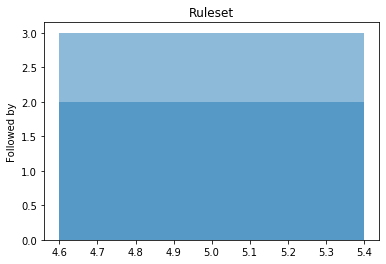

In [73]:
agg=data.pivot_table(index=['follow'], aggfunc='size')

print("\n\nTotal number of data: ",n)
print("\nRuleset followed by: ",agg[1])
print("Ruleset NOT followed by: ",agg[0])

plt.bar(n, agg, align='center', alpha=0.5)
plt.ylabel('Followed by')
plt.title('Ruleset')
plt.show()